# Properties

We start into thermal engineering with python by calculating thermal properties. Doing this we will as well start making use of features python offers for respective calculations. We will

- calculate the specific volume of air as an ideal gas using python
- define a respective function in python
- use matplotlib and numpy for plotting results
- make use of coolprop, a python library for calculating properties  

## Thermal properties

Volume $V$, pressure $p$ and temperature $T$ are properties of a fluid and are subsummized under thermal properties. The relation of these properties can be illustrated as a surface in the $p$,$v$,$T$-space. The figure below shows the respective surface of water. 

![pvt surface of water](img/pvT_water.png)

Note that instead of the volume $V$ the specific volume $v=V/m$ is used in order to find relations that are independent of the actual quantity of the fluid on hand. The specific volume also is the inverse of the Density $\rho = 1/v$. Equations used for calculating conditions are called equations of state. A typical structure is

$$v=v(p,T)$$

One could imagine that this relation is quite complex for real fluids like e.g. water. However, in some regions it is possible to simplify the equation of state. This holds for example for incompressible fluids or ideal gases.

## Calculate the specific volume of air

To keep things simple at the beginning, we start using python for a straight forward calculation of the specific volume of air under typical room conditions. To do so, we first have to find a suitable property model to describe the air at room conditions as a fluid. Here, we can assume, that air will behave like an ideal gas. From basic thermodynamics we know the ideal gas equation of state:

$$pv=RT$$

in which $R$ is the individual gas constant, for air $R=287 \,\frac{\mathrm{kJ}}{\mathrm{kgK}}$. Now, that all theoretical background as well as any specific configuration is known we could write a very simple script to calculate and print the specific volume of air at given conditions. A straight forward solution could be

In [1]:
p = 1 * 10**5 #pressure in Pa
t = 20 + 273.15 # temperature in K
r = 287 #gas constant in J/(kgK)

v =  r * t / p #specific volume in m^3/kg
print(v)

0.8413404999999999


Check if you get the same result. If not, try to find the reason and try to adapt your script accordingly. In the end you should at least be able to reproduce the result by adapting the data given for $p=1 \,\mathrm{bar}$, $T=20 \,°\mathrm{C}$ and the above mentioned ideal gas constant in your script. 

## Build your own property function

If used more than once or twice it is surely useful to improve the code in order to make it available for automated calculations. For this defining a function to calculate the specific volume is a sound approach. A function could be defined for air or -more versatile- for ideal gases in general. A solution for that could look like this

In [ ]:
def calc_v(p, t, r):
    """
    function to calculate specific volume of ideal gas in m^3/kg using
    p: pressure in Pa
    t: temperature in K
    r: gas constant in J/(kgK)
    """
    return r * t / p


p_out = 1 * 10**5 #pressure in Pa
t_out = 20 + 273.15 # temperature in K
r_out = 287.15 #gas constant in J/(kgK)

print(calc_v(p_out, t_out, r_out))

0.8417802249999999


The result should of course be the same. 

## A class for ideal gases

For bigger projects it could even make sense to define a fluid as class. The thermal properties of a fluid in a defined state will then be attributes of an object that is an instance of this class. Even the thermal state itself could be understood as a class. 

All fluids will have a state but how properties are calculated depends on the resprective type of fluid. Ideal gases would for example implement the ideal gas equation of state to calculate the specific volume based on pressure and temperature. Objects may then differ in both thermal state (with individual thermal properties) and type of gas (with their individual gas constant).

A first shot for oject orientated programming could look like this: 

In [1]:
class ThermalState():
    '''
    class for holding thermal properties of a fluid which are
    p: pressure in Pa
    t: temperature in K
    v: specific volume in m^3/kg
    '''
    def __init__(self, p=99., t=99., v=99.):
        self.p = p
        self.t = t
        self.v = v

class IdealGas():
    '''
    class to handle an ideal gas with its thermal properties
    state: object of class type ThemalState, containing the thermal properties
    r_i: individual gas constant in J/(kgK)
    '''
    def __init__(self, r_i=99.):
        self.state = ThermalState()
        self.r_i = r_i

    def set_pt(self, p, t):
        '''
        method to set and calculate the thermal properties based on
        p: pressure in Pa
        t: temperature in K

        v: specific volume in m^3/kg 
        is automatically calculated using method
        calc_v_pt() 
        '''
        self.state.p = p
        self.state.t = t
        self.calc_v_pt(p, t)

    def calc_v_pt(self, p, t):
        '''
        method to calculate specific volume  of ideal gas in m^3/kg using
        p: pressure in Pa
        t: temperature in K
        and the ideal gas objects attribute 
        r: gas constant in J/(kgK)
        '''
        self.state.p = p
        self.state.t = t
        self.state.v = self.r_i * self.state.t / self.state.p
        return self.state.v

air = IdealGas(287.)
air.set_pt(10**5, 293.15)
print(air.state.v)


0.8413404999999999


Eventually delivering the same result, this indeed looks far more complicated. And the code is not even complete as a parent class for generic fluids could be defined and methods to claculate the state for any other combination of two known thermal properties are still missing.

For now we actually do not need the object orientated approach as up to now we do not make any use of it. But it is important to understand, that things in thermal engineering, e.g. a fluid at a certain state, could be understood as objects. This does not only hold for fluids, but also for components, like compressors or heat exchangers, and for systems combined of these, like heat pumps. Later in this course we will make use of respective software concepts as they will then actually ease things. 

## Plotting 


For the next steps, using the simple function should do. Turning back to basic thermodynamics one could be interested in plotting a $p$,$v$-diagram for air in order to use a respective chart to look up the specific volume at different pressures and temperatures. A plot could look like this:

![pv diagram of air](img/pv_air.png)

Try to plot a respective chart on your own using matplotlib. For handling the data it could be helpful to use numpy. Both libraries are installed in your environment if you have tespy installed.

You may need to find yor way around in both using matplotlib for simple plots and numpy for array operations. If you are familiar with these, go ahead and try on your own. You may then compare your results with the suggestion below. Otherwise try to learn from this script and then try to adapt it to plot another diagram of your choice.

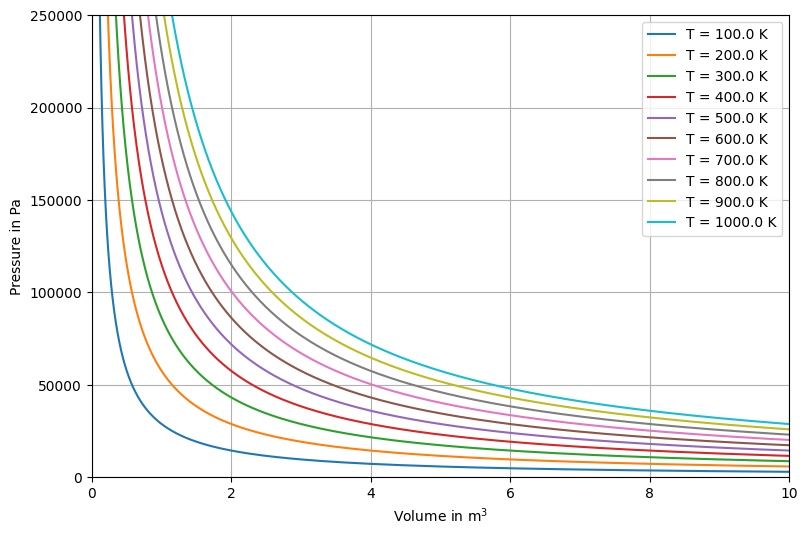

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def calc_v(p, t, r):
    """
    function to calclate volume of ideal gas in m^3/kg using
    p: pressure in Pa
    t: temperature in K
    r: gas constant in J/(kgK)
    """
    return r * t / p

r_out = 287.15 #gas constant in J/(kgK)

#Range for pressures in Pa
p_min = 0.01 * 10**5
p_max = 2.5 * 10**5
p_n = 1000

#Range for temperatures in K
t_min = 100
t_max = 1000
t_n = 10

#Create two arrays holding a set of pressures and temperatures respectively
p_range = np.linspace(p_min, p_max, num=p_n)
t_range = np.linspace(t_min, t_max, num=t_n)

#create array of arrays, holding the calculated volumes
v_range = [calc_v(p_range, t_r, r_out) for t_r in t_range]

#Plotting

#Create a figure that will hold the plots
plt.figure(figsize=[9,6])

#Plot all calculated volumes for each temperature   
for v_t in v_range:
    plt.plot(v_t, p_range)

#Format axes
plt.xlabel('Volume in $\mathrm{m}^3$')
plt.ylabel('Pressure in Pa')
plt.axis([0, 10, 0, p_max])

#Add legend and grid
t_label = [f"T = {T} K" for T in t_range]
plt.legend(t_label)
plt.grid(True)

#Display plot
plt.show()


## CoolProp

CoolProp (http://www.coolprop.org/) is a powerful C++ library for prorerty calculation that comes with a python wrapper. The most importatn function within Cool.Prop.CoolProp is PropsSI. The following example shows, how PropsSI is used in python.

In [3]:
from CoolProp.CoolProp import PropsSI as prop

p = 1 * 10**5 #Pressure in Pa
t = 20 + 273.15 #Temperature in K

fluid = 'Air'

v = 1/prop('D','P',p ,'T', t, fluid)

print(v)


0.8411720268193159


You may notice that the script basically does just the same as the first scripts we used to calculate the specific volume of air. However, there is a slight difference between the values above and the value calculated using CoolProp. The reason for that is, that CoolProp does not calculate the air as an ideal gas as we did. The model used for calculating thermal properties hence is different from the ideal gas equation of state. 

## Compressibility

Although quite close the results for the specific volume of air using CoolProp and the ideal gas equation of state do not match exactly at $p=1 \,\mathrm{bar}$ and $T=20 \,°\mathrm{C}$. The ratio

$$Z=pv/R_iT$$

is defined as the compressibility $Z$ of a gas. If $Z$ is less than unity a gas is compressed in comparision to what would be expected for an ideal gas. If $Z$ is greater than unity the real gas takes more volume than an ideal gas would do. The compressibility is both a function of the thermal properties pressure and temperature and depending on the specific gas.

Investigate the compressibility of air in the pressure range between 0.1 and 100 bar and the temperature range between 200 and 400 K. Decide on a suitable concept to visualize the results. For all that you can make use of almost all concepts we used before in this unit.

One solution might be the script below.

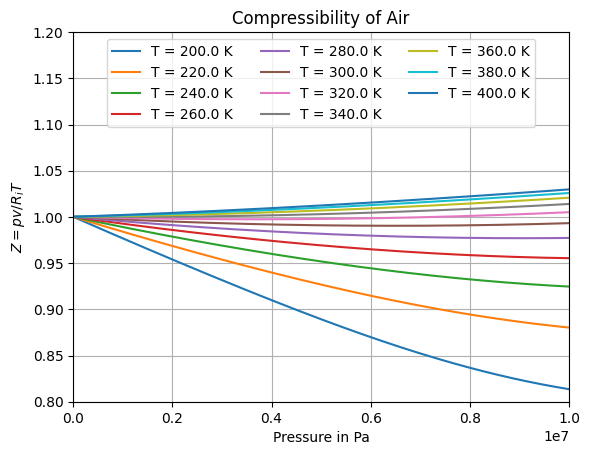

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from CoolProp.CoolProp import PropsSI as prop

p = 10**5
t = 273.15
r_i = 287.

p_range = np.linspace(0.1*10**5, 100*10**5, num=1000)
t_range = np.linspace(200, 400, num=11)

fluid = 'Air'

z_range = [1/prop('D', 'P', p_range, 'T', t_r, fluid) / (r_i * t_r / p_range) for t_r in t_range]

plt.figure()
for z_r in z_range:
    plt.plot(p_range, z_r)
plt.xlabel('Pressure in Pa')
plt.ylabel('$Z=pv/R_iT$')
plt.title('Compressibility of Air')
plt.axis([0, 100*10**5, 0.8, 1.2])
label = [f'T = {t_r} K'for t_r in t_range]
plt.legend(label, loc=9, ncols=3)
plt.grid(True)
plt.show()


It is worth playing around a little with this script to understand how air and other gases behave in different ranges of temperature and pressure.

## Next steps

There are other properties of interest in thermal engineering. Soon we will use the caloric property enthalpy and the entropy. Also for enthalpy and entropy real gases differ from ideal or perfect gases. Analogously to what we did with compressibility one could investigate, how different approaches for gases lead to different results, e.g. 
$$
\Delta h = c_p \Delta T 
$$
$$
\mathrm{d} h = c_p \mathrm{d} T
$$
$$
\mathrm{d}h=\left(\frac{\partial h}{\partial T}\right)_p\,\mathrm{d}T+ \left(\frac{\partial h}{\partial p}\right)_T\,\mathrm{d}p
$$

The next unit is about single components in thermal engineering. To prepare working with python on that field you should refresh your knowledge on how to calculate steady state power and rate of heat transfer in control volumes. We will deal with balancing and calculating simple heat exchangers and turbomachinery, such as compressors or turbines. At this point we will not consider detailed mechanisms of heat transfer or fluid dynamics but just balancing equations.

Besides of that it is recommended to have a closer look at matplotlib. With pyplot you can plot almost anything (cf. https://matplotlib.org/stable/gallery/index.html).
